# 2.7. Feature Engineering with ColumnTransformers

## Challenge :: Feature Engineer your data

In [1]:
import pandas as pd

In [75]:
df = pd.read_csv("../data/train.csv", sep=",")
df.head(250)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S


In [46]:
df[df['Fare'].notna()][df['Cabin'].notna()].sort_values(by="Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


<AxesSubplot:>

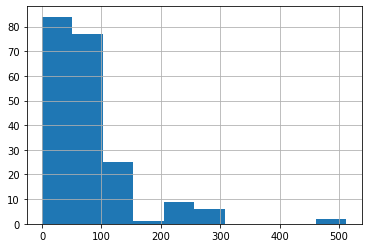

In [47]:
df[df['Fare'].notna()][df['Cabin'].notna()].sort_values(by="Fare", ascending=False)['Fare'].hist()

In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer

from sklearn.pipeline import make_pipeline

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'Name']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name
733,2,male,23.0,0,0,13.0000,S,NaN,"Berriman, Mr. William John"
857,1,male,51.0,0,0,26.5500,S,E17,"Daly, Mr. Peter Denis"
81,3,male,29.0,0,0,9.5000,S,NaN,"Sheerlinck, Mr. Jan Baptist"
319,1,female,40.0,1,1,134.5000,C,E34,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
720,2,female,6.0,0,1,33.0000,S,NaN,"Harper, Miss. Annie Jessie ""Nina"""
...,...,...,...,...,...,...,...,...,...
575,3,male,19.0,0,0,14.5000,S,NaN,"Patchett, Mr. George"
838,3,male,32.0,0,0,56.4958,S,NaN,"Chip, Mr. Chang"
337,1,female,41.0,0,0,134.5000,C,E40,"Burns, Miss. Elizabeth Margaret"
523,1,female,44.0,0,1,57.9792,C,B18,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)"


In [252]:
def age_by_group(df):
    df.groupby(by=['Sex', 'Pclass'])
    df.groupby(by=['Sex', 'Pclass'])['Age']
    df.loc[df['Age'].isna(), 'Age'] = df.groupby(by=['Sex', 'Pclass'])['Age'].transform('mean')
    return df

In [266]:
def cabin_to_deck(df):  
#     print(X_train['Cabin'].to_string())
    df['Cabin'] = df[df['Cabin'].notna()]['Cabin'].astype(str).str[0]
#     df['Cabin_2'] = df[df['Cabin'].notna()]['Cabin'].astype(str).str[0]
#     df['Cabin_3'] = df['Cabin'].map({'A': 1, 'B': 2, 'E': 4}, na_action="ignore")
    return df

# # print(X_train[X_train['Cabin'].notna()])

# cabin_to_deck(X_train).sort_values(by="Cabin")
# # cabin_to_deck(X_train)['Cabin_2'].value_counts()
# # X_train['Cabin'].to_string()
# # print(pd.DataFrame(cabin_to_deck2(cabin_to_deck(X_train))))

In [8]:
# def extract_surname(df):
#     df['last_name'] = df['Name'].str.split(',', 1).str[0]
#     return df

In [129]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,BraundS
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,CumingsC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,HeikkinenS
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,FutrelleS
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,AllenS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,MontvilaS
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,GrahamS
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,JohnstonS
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,BehrC


In [200]:
def add_family_size(df: pd.DataFrame):
#     SibSp
#     Parch
    df.loc[(df['SibSp'] >= 5), 'family_tshirt_size'] = 'XL'
    df.loc[(df['SibSp'] >= 3) & (df['SibSp'] < 5), 'family_tshirt_size'] = 'L'
    df.loc[(df['SibSp'] == 2), 'family_tshirt_size'] = 'M'
    df.loc[(df['SibSp'] == 1), 'family_tshirt_size'] = 'S'

    return df


add_family_size(X_train)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,family,family_tshirt_size
733,2,male,23.000000,0,0,13.0000,S,NaN,"Berriman, Mr. William John",BerrimanS,NaN
857,1,male,51.000000,0,0,26.5500,S,E,"Daly, Mr. Peter Denis",DalyS,NaN
81,3,male,29.000000,0,0,9.5000,S,NaN,"Sheerlinck, Mr. Jan Baptist",SheerlinckS,NaN
319,1,female,40.000000,1,1,134.5000,C,E,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",SpeddenC,S
720,2,female,6.000000,0,1,33.0000,S,NaN,"Harper, Miss. Annie Jessie ""Nina""",HarperS,NaN
...,...,...,...,...,...,...,...,...,...,...,...
575,3,male,19.000000,0,0,14.5000,S,NaN,"Patchett, Mr. George",PatchettS,NaN
838,3,male,32.000000,0,0,56.4958,S,NaN,"Chip, Mr. Chang",ChipS,NaN
337,1,female,41.000000,0,0,134.5000,C,E,"Burns, Miss. Elizabeth Margaret",BurnsC,NaN
523,1,female,44.000000,0,1,57.9792,C,B,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",HippachC,NaN


In [290]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,family_tshirt_size
733,2,male,23.000000,0,0,13.0000,S,NaN,"Berriman, Mr. William John",NaN
857,1,male,51.000000,0,0,26.5500,S,E,"Daly, Mr. Peter Denis",NaN
81,3,male,29.000000,0,0,9.5000,S,NaN,"Sheerlinck, Mr. Jan Baptist",NaN
319,1,female,40.000000,1,1,134.5000,C,E,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",S
720,2,female,6.000000,0,1,33.0000,S,NaN,"Harper, Miss. Annie Jessie ""Nina""",NaN
...,...,...,...,...,...,...,...,...,...,...
575,3,male,19.000000,0,0,14.5000,S,NaN,"Patchett, Mr. George",NaN
838,3,male,32.000000,0,0,56.4958,S,NaN,"Chip, Mr. Chang",NaN
337,1,female,41.000000,0,0,134.5000,C,E,"Burns, Miss. Elizabeth Margaret",NaN
523,1,female,44.000000,0,1,57.9792,C,B,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",NaN


In [286]:
pipeline = make_pipeline(
        FunctionTransformer(age_by_group),
        FunctionTransformer(cabin_to_deck),
#         FunctionTransformer(extract_surname),
        FunctionTransformer(add_family_size),
# #         FunctionTransformer(drop_unused_columns),
        ColumnTransformer([
            ('quantile_age', KBinsDiscretizer(n_bins=3, strategy='quantile'), ['Age']),
            ('quantile_fare', KBinsDiscretizer(n_bins=3, strategy='quantile'), ['Fare']),
            ('ohe_and_sex', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex']),
            ('ohe_deck', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Cabin']),
            ('ohe_family_tshirt_size', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['family_tshirt_size']),
            ('scale_fare', MinMaxScaler(), ['Fare']),
            ('do_nothing', 'passthrough', ['Pclass']),
            ('family_with_kids', Binarizer(), ['Parch'])
        ], remainder='drop'),
    )

pipeline.fit(X_train)
X_train_fe = pipeline.transform(X_train)
X_test_fe = pipeline.transform(X_test)

pd.DataFrame(X_train_fe)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.025374,2.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.051822,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.018543,3.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.262527,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.064412,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.028302,3.0,0.0
708,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.110272,3.0,0.0
709,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.262527,1.0,0.0
710,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.113168,1.0,1.0


In [287]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
m = LogisticRegression()
# train the model
m.fit(X_train_fe, y_train)
# score train data
print('score train data: %0.4f' % m.score(X_train_fe, y_train))
# score test data
print('score test data: %0.4f' % m.score(X_test_fe, y_test))

score train data: 0.8202
score test data: 0.7821


In [ ]:
m.score(X_train_fe, y_train)

In [ ]:
m.score(X_test_fe, y_test)

In [ ]:
m.predict(X_test_fe)

## Fuzzy string matching like a boss

https://github.com/seatgeek/thefuzz

In [ ]:
pip install --no-input thefuzz

In [ ]:
pip install --no-input python-Levenshtein

In [ ]:
# pip freeze > requirements.txt

In [ ]:
from thefuzz import fuzz
from thefuzz import process

In [ ]:
fuzz.ratio("this is a test", "this is a test!")

In [ ]:
df[['Name']]

In [198]:
df[df['Name'].str.contains(".*Sage.*")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,SageS
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,SageS
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,SageS
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,SageS
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C,SagesserC
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,SageS
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,SageS
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,SageS


In [ ]:
df['Embarked'].value_counts()

## Style

In [24]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
